In [1]:
from plot_availability_schematics import *
import datetime
from datetime import datetime

# Test code from 'plot_availability_schematics.py'

In [2]:
read_availability()

Reading:  https://raw.githubusercontent.com/arfogg/dataset_availability/main/mission_start_and_end.csv


,name,start_month,start_year,end_month,end_year,space_ground_flag,comment_dates,comment_data,sdtime,edtime
0,Wind,11.0,1994.0,NaN,NaN,space,ongoing,"AKR observations, IMF, solar wind plasma; at L...",1994-11-01,2024-06-12 23:57:59.304062
1,SuperDARN,10.0,1983.0,NaN,NaN,ground,ongoing,"velocity, backscattered power at various locat...",1983-10-01,2024-06-12 23:57:59.304144
2,THEMIS,2.0,2007.0,NaN,NaN,space,ongoing,"5 spacecraft THEMIS A-E; magnetic field, plasma",2007-02-01,2024-06-12 23:57:59.304198
3,SuperMAG indices,NaN,1968.0,NaN,2023.0,ground,ongoing,"SMR, SMR LT, SME, SME MLAT, SME MLT, SMU, SML",1968-01-01,2023-01-01 00:00:00.000000
4,SuperMAG magnetometers,NaN,1970.0,NaN,NaN,ground,ongoing,number of magnetometers increases with time,1970-01-01,2024-06-12 23:57:59.304327
5,IMAGE magnetometers,NaN,1982.0,NaN,NaN,ground,ongoing,"number of magnetometers increases with time, o...",1982-01-01,2024-06-12 23:57:59.304367
6,MagIE,NaN,1991.0,NaN,NaN,ground,ongoing,stations across Ireland: Valentia and Armagh l...,1991-01-01,2024-06-12 23:57:59.304406
7,GOES 1-18,NaN,1975.0,NaN,NaN,space,ongoing,"Xray flux at different wavelength, protons, ma...",1975-01-01,2024-06-12 23:57:59.304445
8,Auroral Electrojet indices,NaN,1957.0,NaN,2018.0,ground,stopped 2018,"AU, AL, AE, AO; hourly AE since 1957,",1957-01-01,2018-01-01 00:00:00.000000
9,OMNI hourly / daily,NaN,1963.0,NaN,NaN,space,ongoing,includes space and ground based stuff,1963-01-01,2024-06-12 23:57:59.304544


Reading:  https://raw.githubusercontent.com/arfogg/dataset_availability/main/mission_start_and_end.csv


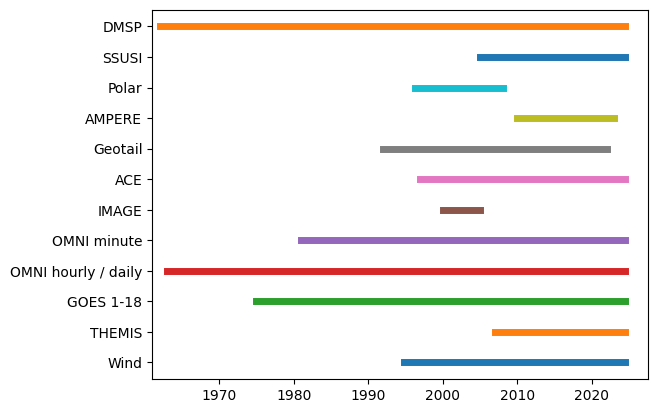

In [3]:
all_space()

# Create function to open all .csv files and convert column values to proper dtypes

In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import datetime
from datetime import datetime

file_dict = {"Forsyth" : "Forsyth2015.csv", # Solely onsets - models 'sophie.txt' files
             "Frey" : "Frey_2004_2006.csv",
             "Lio" : "Lio_2010.csv",
             "NG" : "Newell_Gjerloev2011.csv",
             "Ohtani" : "Ohtani_Gjerloev2020.csv", 
             "Soph50" : "sophie_50.txt",
             "Soph75" : "sophie_75.txt",
             "Soph90" : "sophie_90.txt"}

def open_csv(key):
 
    if (key == "Soph50") or (key == "Soph75") or (key == "Soph90"):
        # Read in '.csv' file using key-value relationship established in dictionary
        file = file_dict[key]
        print('File you are accessing is: ', file)

        # Connect to Github copies of Substorm data published
        url= f"https://raw.githubusercontent.com/arfogg/dataset_availability/main/substorm_lists/sophie_substorm_list/{file}"
        data = np.loadtxt(url, skiprows = 13, delimiter = ' ', dtype = str)

        # Manipulate the time-date format in '.txt' files to easily interpretable columns
        data[:, 0] = [datetime.strptime(data[i, 0], "%Y/%m/%d-%H:%M:%S") for i in range(len(data))]
        data = pd.DataFrame(data, columns = ['Date-UTC', 'Phase', 'Flag'] )
        
        # Conversion of datatypes to NUMERIC (i.e. integer) and datetime
        data['Phase'] = pd.to_numeric(data['Phase'])
        data['Flag'] = pd.to_numeric(data['Flag'])
        data['Date-UTC'] = pd.to_datetime(data['Date-UTC'])

        # Omit data points that are flagged (i.e. where data['Flag'] == 1)
        data = data.iloc[np.where(data['Flag'] == 0)[0]]

        ## Create 6 columns separating year, month, day, hour, minute, second
        #data['Year'] = [data["Date-UTC"].iloc[i].year for i in range(np.shape(data)[0])]
        #data['Month'] = [data["Date-UTC"].iloc[i].month for i in range(np.shape(data)[0])]
        #data['Day'] = [data["Date-UTC"].iloc[i].day for i in range(np.shape(data)[0])]
        #data['Hour'] = [data["Date-UTC"].iloc[i].hour for i in range(np.shape(data)[0])]
        #data['Minute'] = [data["Date-UTC"].iloc[i].minute for i in range(np.shape(data)[0])]
        #data['Second'] = [data["Date-UTC"].iloc[i].second for i in range(np.shape(data)[0])]
    
    else:

        file = file_dict[key]
        print('File you are accessing is: ', file)

        # Connect to Github copies of Substorm data published
        url= f"https://raw.githubusercontent.com/arfogg/dataset_availability/main/substorm_lists/{file}"
        data = pd.read_csv(url)

        # Convert to proper datetime format
        data['Date_UTC'] = pd.to_datetime(data['Date_UTC'])

    return data

In [ ]:
# String separation - EXTRA 
new = data["Date-UTC"].str.split(" ", n=1, expand = True)
date, time = new[0], new[1]
ymd, hms = date.str.split("-", n = 3, expand = True), time.str.split(":", n = 3, expand = True)
data['Year'], data['Month'], data['Day'] = ymd[0], ymd[1], ymd[2]
data['Hour'], data['Minute'], data['Second'] = hms[0], hms[1], hms[2]